<a href="https://colab.research.google.com/github/petrusthelastking/TANDANG_GAWE_KUIS_ULO-PYTHON-/blob/main/JS11_Klasifikasi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00


# PRAKTIKUM 1

## import library

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Membuat Data Dummy

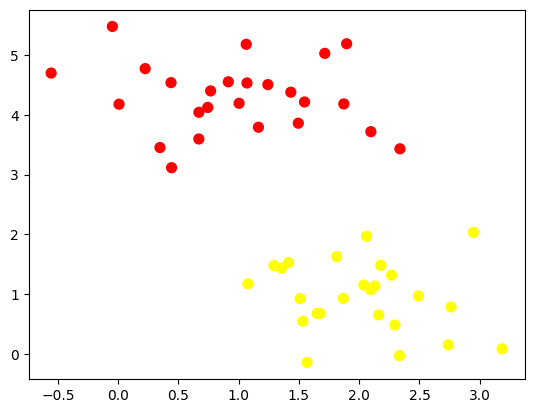

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Buat Ilustrasi Garis Pemisah

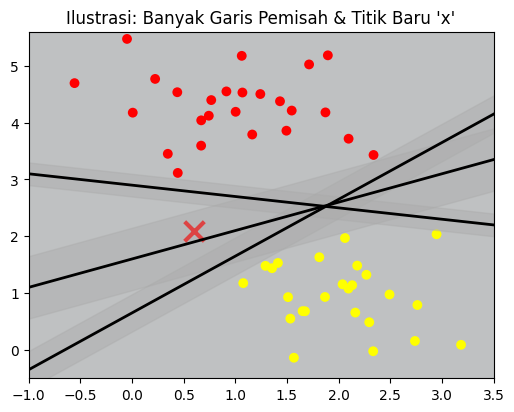

In [16]:
# --- lanjut dari cell kamu ---
plt.figure(figsize=(6, 4.5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='none')

# Titik data baru 'x' (opsional, sesuai ilustrasi awal)
plt.scatter(0.6, 2.1, marker='x', s=200, linewidths=3, c='red')

# Garis + margin (sesuai snippet kamu)
xfit = np.linspace(-1, 3.5, 200)
for m, b, d in [(1.0, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k', linewidth=2)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

# Styling agar mirip contoh
ax = plt.gca()
ax.set_facecolor('#bfc1c2')
plt.xlim(-1, 3.5)
plt.ylim(-0.5, 5.6)
plt.title("Ilustrasi: Banyak Garis Pemisah & Titik Baru 'x'")
plt.show()


## `Ilustrasi Margin`

(-1.0, 3.5)

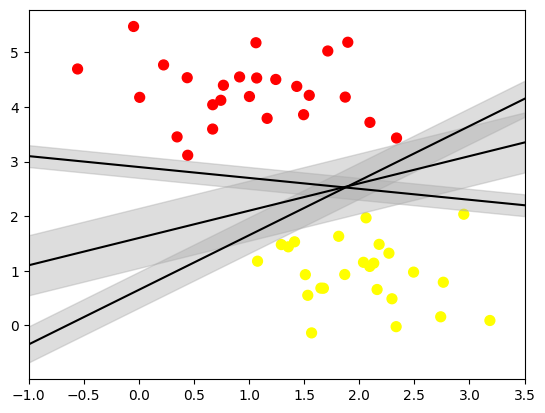

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Fitting Model

In [18]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [19]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

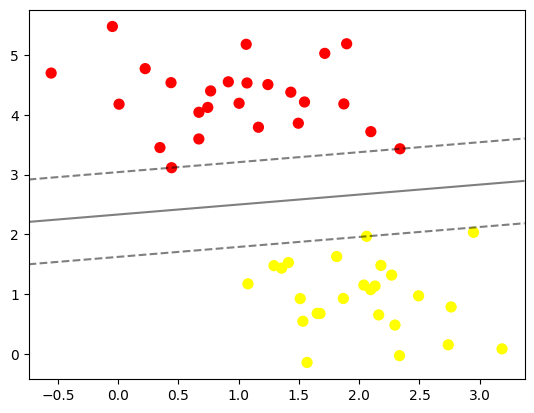

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [21]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

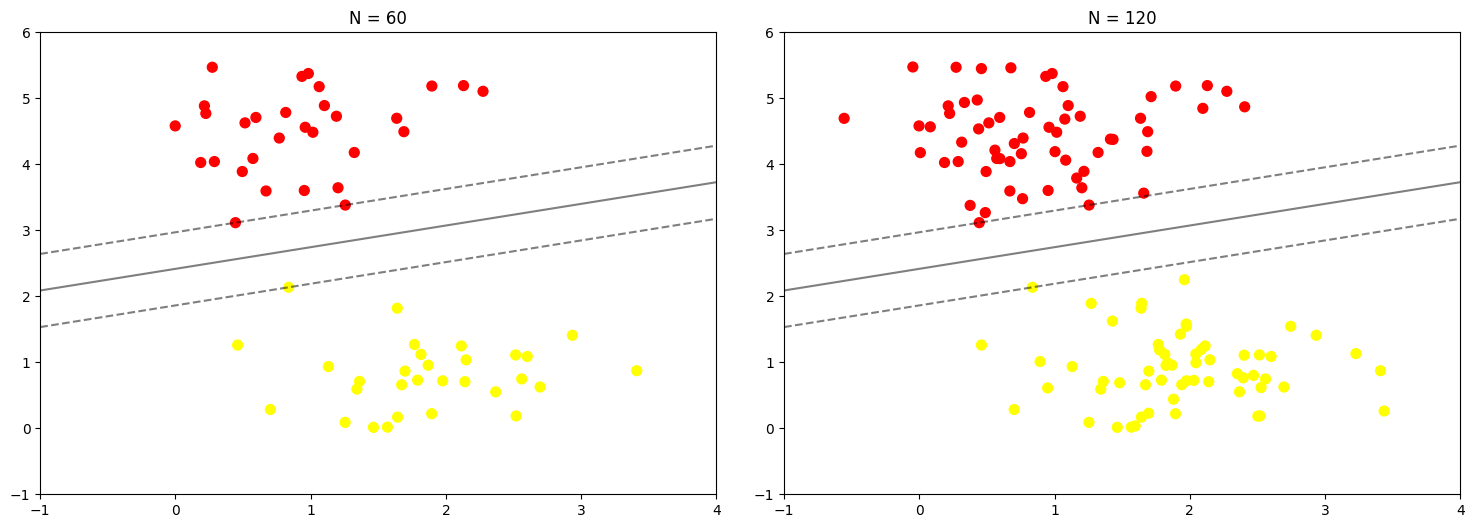

In [22]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [23]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# PRAKTIKUM 2

## Ilustrasi Data Non-Linier

### 1a - Import Library

In [26]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### 1b - Buat Kembali Fungsi Plotting

In [27]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1c - Buat Data Dummy Non-Linier

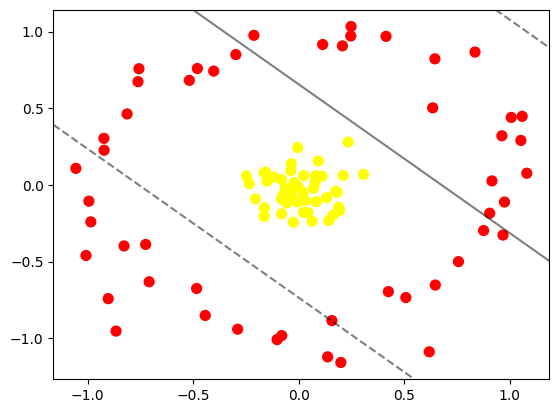

In [28]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [30]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    r = np.exp(-(X ** 2).sum(1)) # Calculate r from X
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.61821087, -1.08882011],
       [ 0.09223193,  0.15612243],
       [-0.7092876 , -0.63180769],
       [-0.92262408,  0.22640362],
       [ 0.87569309, -0.29776055],
       [-0.23520461,  0.00780893],
       [ 0.50717827, -0.7347477 ],
       [-0.06385929, -0.02455002],
       [ 0.42431778, -0.69610732],
       [-0.00571687,  0.24348255],
       [ 0.14191034, -0.23226708],
       [-1.00854084, -0.46055835],
       [-0.0819012 , -0.09215873],
       [ 0.83500094,  0.86652465],
       [-0.51876288,  0.682056  ],
       [ 0.18004358, -0.0489753 ],
       [-0.05743619, -0.11796248],
       [-0.8662052 , -0.95367455],
       [-0.72577179, -0.38845049],
       [ 0.08158964,  0.0465687 ],
       [ 0.08015518,  0.05959494],
       [-0.00776033, -0.11109659],
       [ 0.6345287 ,  0.50249776],
       [ 0.18887242, -0.14601801],
       [-0.29856973,  0.85009973],
       [ 1.0804751 ,  0.07608617],
       [-0.02307844,  0.01496513],
       [ 0.96231853,  0.32046374],
       [-0.28988269, -0.94145578],
       [ 0.75668091, -0.50063159],
       [-0.90333078, -0.74213293],
       [ 1.05252238,  0.29005906],
       [ 0.07723987,  0.01641193],
       [-0.10307388, -1.00923   ],
       [-0.07345072, -0.06304286],
       [-0.76223053,  0.67373092],
       [ 0.41331826,  0.96907688],
       [ 0.97478324, -0.11192567],
       [ 0.24761819,  1.03346198],
       [-0.21298556,  0.97586249],
       [-0.16450187, -0.20557423],
       [ 0.16246311, -0.19711841],
       [-0.03799641,  0.0935001 ],
       [-0.98576294, -0.24120596],
       [ 0.64695858, -0.6534176 ],
       [-0.05376282, -0.10247862],
       [ 0.23323131,  0.27982023],
       [-0.99489131, -0.10623149],
       [ 0.06343479, -0.23733733],
       [ 0.91536553,  0.02605596],
       [-0.08140143, -0.18922995],
       [-0.00393669, -0.01031122],
       [ 0.08282058, -0.10955198],
       [-0.03597455,  0.13862558],
       [ 0.02291447,  0.06071043],
       [-0.24854433,  0.05861153],
       [ 0.96754976, -0.32717968],
       [-0.02219797,  0.00652336],
       [-0.48079502,  0.75916676],
       [-0.757611  ,  0.75794795],
       [-0.15054716,  0.02378757],
       [ 1.05857436,  0.44754491],
       [ 0.19258968, -0.1658261 ],
       [ 0.90457873, -0.18467416],
       [ 0.24640563,  0.97127708],
       [-1.05651214,  0.10787598],
       [ 0.64492154,  0.82257469],
       [ 0.1567647 , -0.88541728],
       [ 0.13137723, -0.08331191],
       [ 0.01984916, -0.04915254],
       [-0.20592946, -0.09081873],
       [-0.82831074, -0.39800814],
       [-0.06267386, -0.04523536],
       [ 0.11297788,  0.91585031],
       [ 0.0429857 , -0.18141099],
       [-0.9237447 ,  0.30380166],
       [ 0.10927471,  0.05721216],
       [-0.04331449, -0.06825686],
       [-0.11747917,  0.05136347],
       [-0.08200444,  0.03421745],
       [-0.16403803,  0.07951727],
       [ 0.02249068, -0.17961398],
       [ 0.13659993, -1.12185799],
       [ 0.03080255, -0.10128811],
       [ 0.19919245, -1.15842698],
       [ 0.17479162, -0.04169302],
       [-0.40329129,  0.74237195],
       [-0.15595787,  0.08314966],
       [-0.08110923, -0.98289261],
       [ 1.00679476,  0.44006578],
       [-0.81384764,  0.46288825],
       [-0.44348245, -0.85155468],
       [-0.48432725, -0.675611  ],
       [-0.02626723, -0.24418467],
       [ 0.20997487,  0.06165382],
       [ 0.30662279,  0.0686109 ],
       [-0.16235857, -0.14910814],
       [ 0.20679801,  0.90699636],
       [-0.03520204, -0.0642709 ],
       [ 0.06893355, -0.02201944]]), y=array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]))>

## Fitting Model

In [31]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

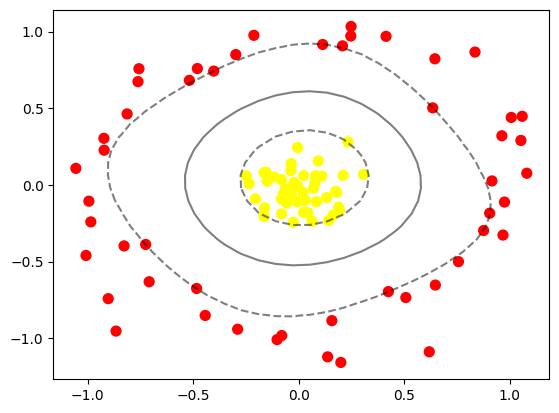

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')